In [1]:
#esto es una prueba a ver si se sube
import support_functions as sp
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score



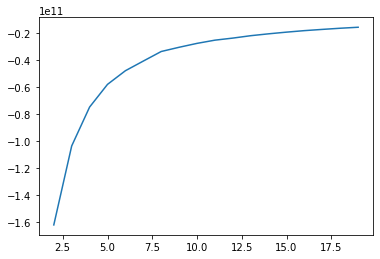

In [2]:
# X e Y son matrices, XL y Yl están vectorizadas y sin etiquetas 0
X,Y,Xl,Yl = sp.aviris_data_load()

#Las etiquetas van de 1 a 16
n_clusters = np.arange(2,20)

# Entrenamos una serie de algoritmos kmeans con diferente número de clusters
clstrs = [KMeans(n_clusters = i) for i in n_clusters]
clstrs_fit = [model.fit(Xl) for model in clstrs]
clstrs_score = [model.score(Xl) for model in clstrs_fit]

figure, splot = plt.subplots()
splot.plot(n_clusters,clstrs_score)

In [ ]:
X = X.reshape([145*145,220])
clstrs_predictions = [model.predict(X) for model in clstrs_fit]
clstrs_Y = [pred.reshape([145,145,1]) for pred in clstrs_predictions]

#class_map es una función en support functions que da una imagen 
#del suelo donde aparece la clase ( o el cluster ) de cada pixel
#Obtenemos las gráficas de Shilouette

#ALERTA !!!!!! si piensas que se te ha pillado el ordenador, tranquilo, este proceso es muy pesado
[sp.class_map(X,im) for im in clstrs_Y]

In [ ]:
#Obtenemos las puntuaciones de Silhouette (Tarda un buen rato, aviso)
clstrs_shilouette = [silhouette_score(X, pred.reshape([145*145]), metric='euclidean') for pred in clstrs_Y]
#Obtenemos las gráficas de Shilouette
[sp.draw_silhouette(X,pred.reshape([145*145])) for pred in clstrs_Y]
